In [128]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings(
    'ignore'
)

In [129]:
pd.set_option('display.max_columns', None)

In [130]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')

In [131]:
import logging,hashlib,os
from io import StringIO

def setup_logging(log_file = 'logs/pipeline.log'):
    os.makedirs(os.path.dirname(log_file),exist_ok=True)
    logging.basicConfig(filename=log_file,
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%I:%M:%S %p %d-%b-%Y')

    return logging

def get_file_hash(path):
    with open (path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

In [132]:
logging = setup_logging()
logging.info('Starting the New Machine Learning Experiment.\n')

In [133]:
dataset_version = get_file_hash('alzheimers_prediction_dataset.csv')
logging.info(f'Dataset Hash: {dataset_version}\n')

In [134]:
logging.info('Dataset Loaded Successfully.\n')
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,Normal,No,90,Low,Poor,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,Normal,No,65,Low,Good,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,Normal,No,43,High,Good,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,Normal,No,81,Medium,Average,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,Normal,No,49,High,Poor,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [135]:
buffer = StringIO()
df.info(buf=buffer)
logging.info(f"\nDataset Information:\n{buffer.getvalue()}\n")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [136]:
shape = df.shape
logging.info(f'Dataset Shape:{shape}\n')
print('Shape of the dataset:',shape)

Shape of the dataset: (74283, 25)


In [137]:
cols = df.columns

logging.info(f'Dataset Columns:{cols}\n' )
print('Columns Names:', cols)

Columns Names: Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')


In [138]:
print('Null Values Count:')
df.isnull().sum()

Null Values Count:


Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [139]:
nullcount = df.isnull().sum().sum()
logging.info(f'Null Values Count: {nullcount}\n')
print('Null Values Exist:',nullcount)

Null Values Exist: 0


In [140]:
duplicate = df.duplicated().sum()
logging.info(f'Duplicated Values Count: {duplicate}\n')
print('Duplicates Value Exist:',duplicate)

Duplicates Value Exist: 0


In [141]:
datatype = df.dtypes
logging.info(f'\nDatatypes Check: {datatype}\n')
print('Datatypes Check:\n',datatype)

Datatypes Check:
 Country                                  object
Age                                       int64
Gender                                   object
Education Level                           int64
BMI                                     float64
Physical Activity Level                  object
Smoking Status                           object
Alcohol Consumption                      object
Diabetes                                 object
Hypertension                             object
Cholesterol Level                        object
Family History of Alzheimer’s            object
Cognitive Test Score                      int64
Depression Level                         object
Sleep Quality                            object
Dietary Habits                           object
Air Pollution Exposure                   object
Employment Status                        object
Marital Status                           object
Genetic Risk Factor (APOE-ε4 allele)     object
Social Engagement Leve

---

#### **Exploratory Data Analysis**

In [142]:
sns.set_style('dark')

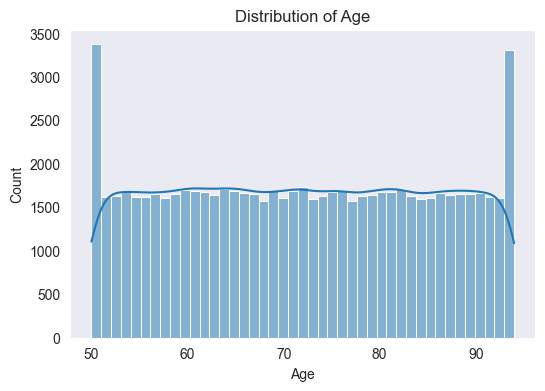

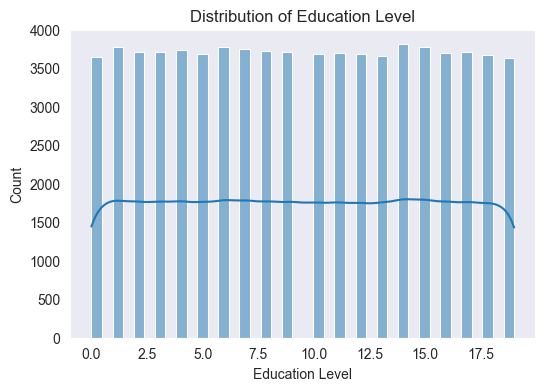

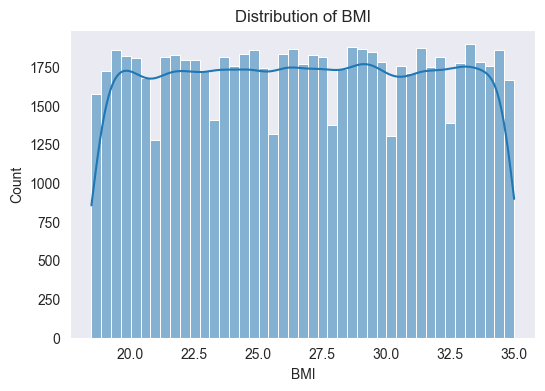

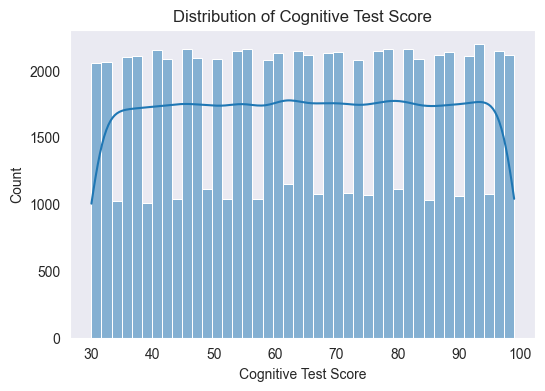

In [143]:
if not os.path.exists('Visuals'):
    os.mkdir('Visuals')

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(f'Visuals/{col}_distribution.png') 
    plt.show()
    logging.info(f'Histogram saved for {col} column.\n')

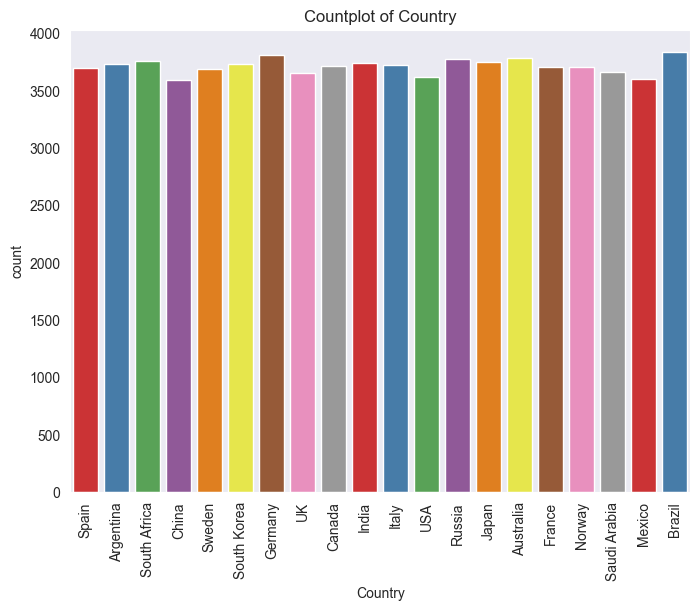

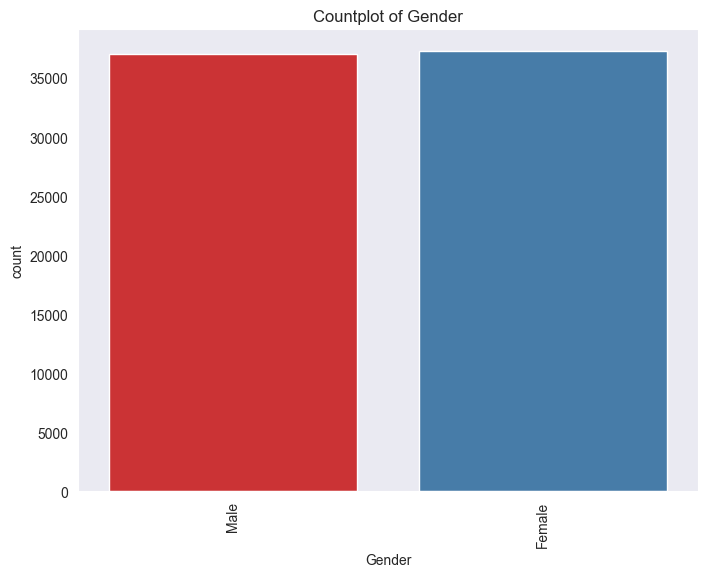

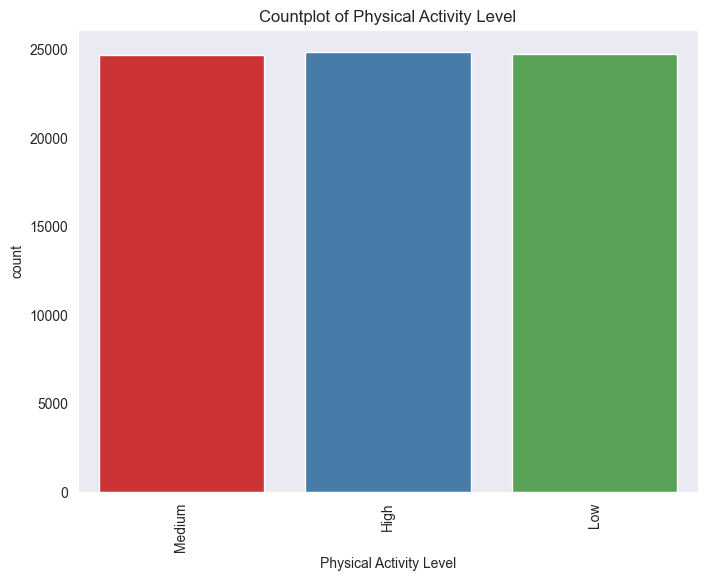

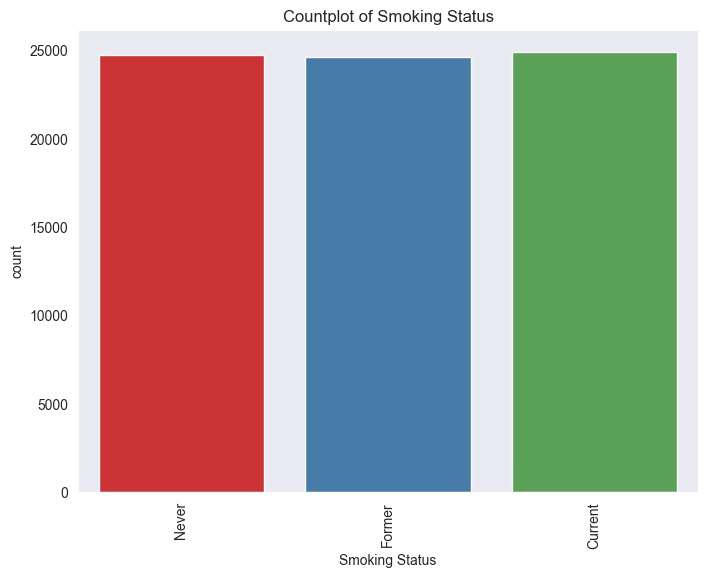

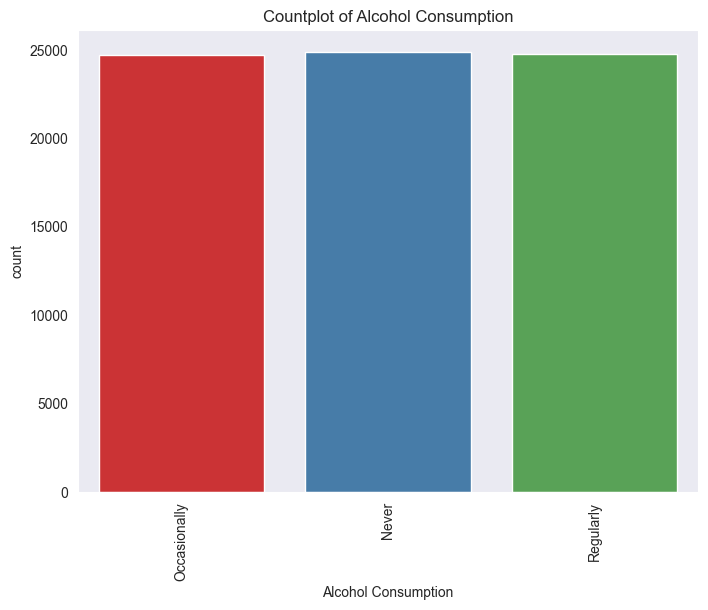

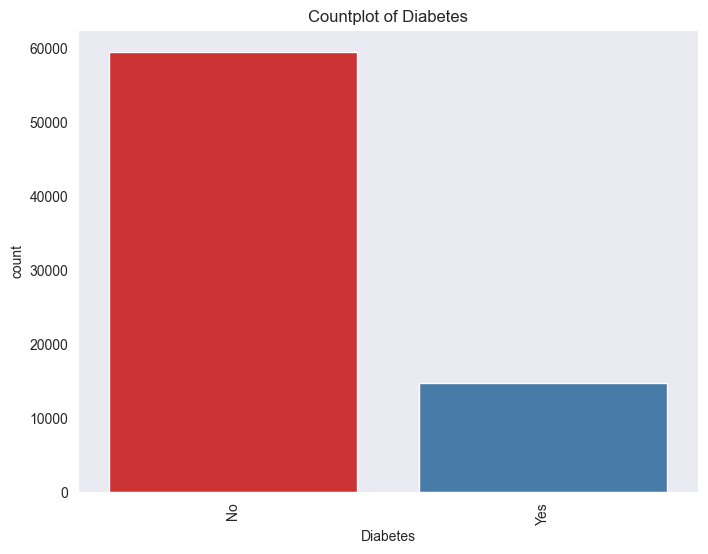

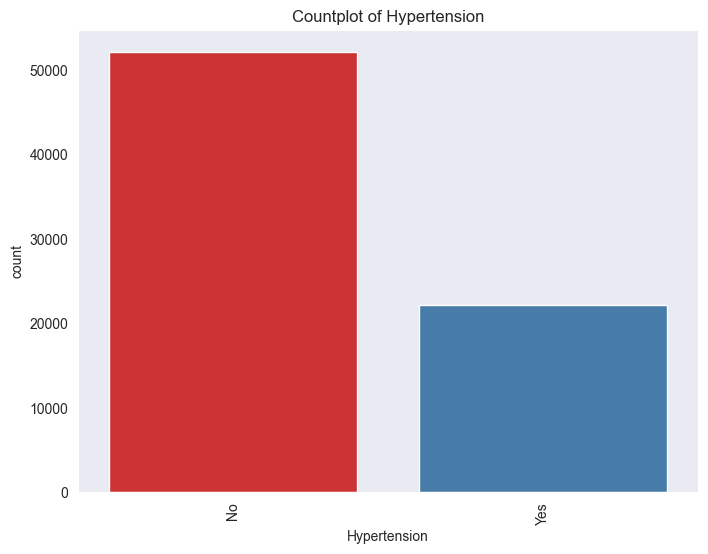

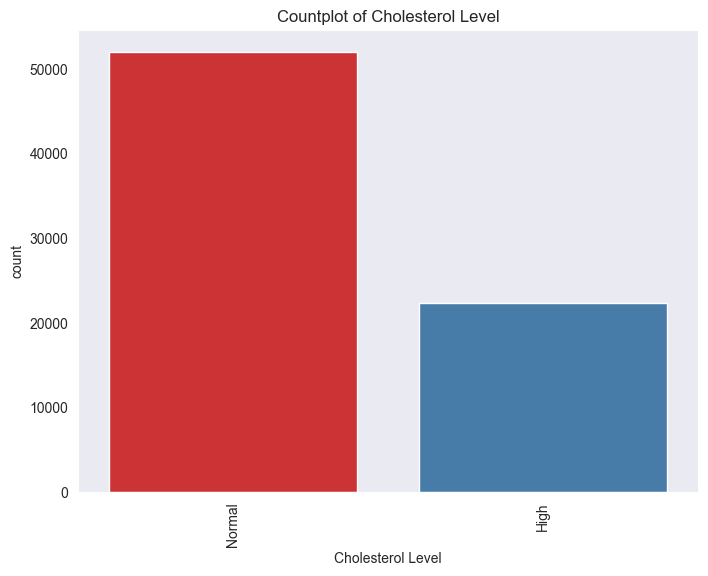

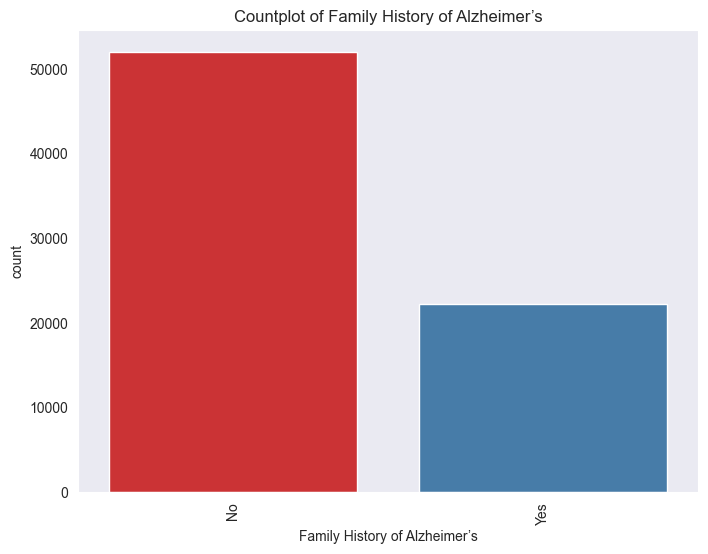

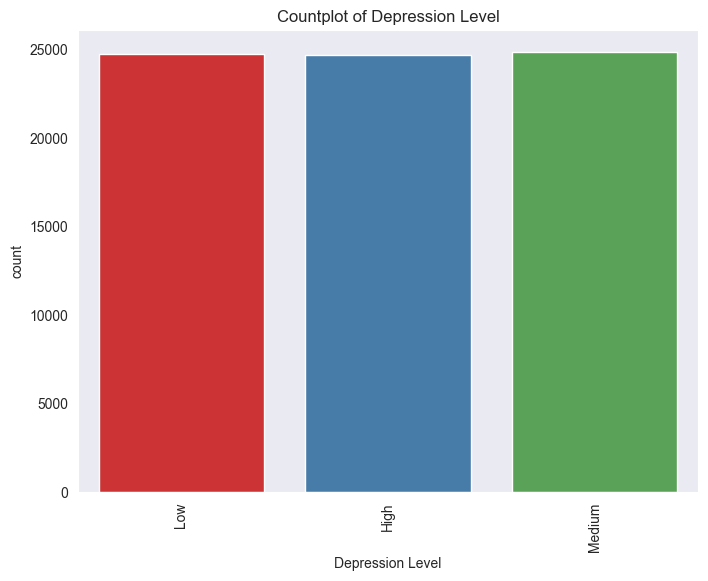

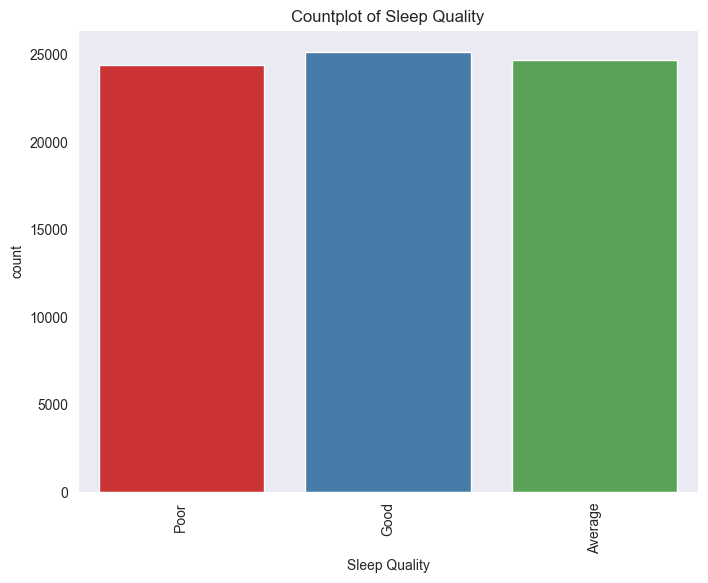

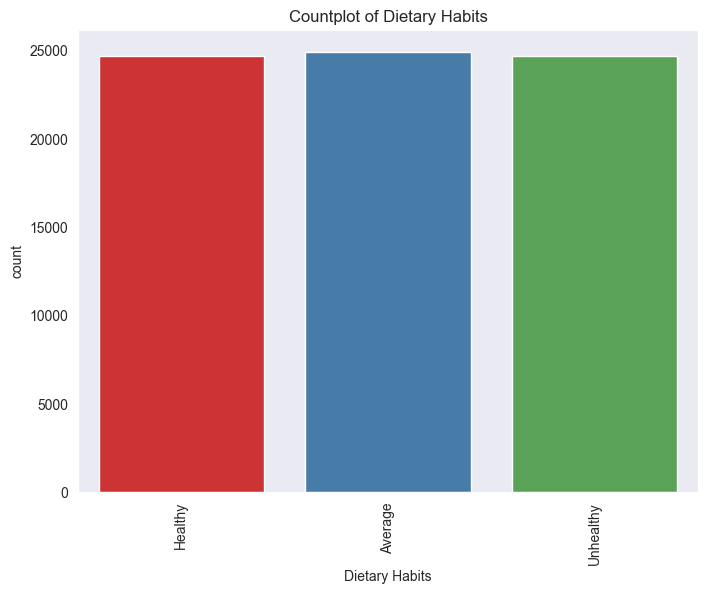

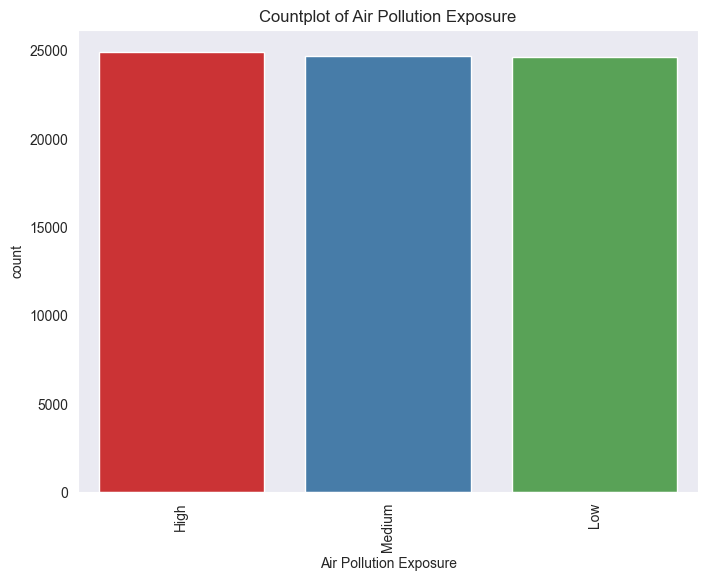

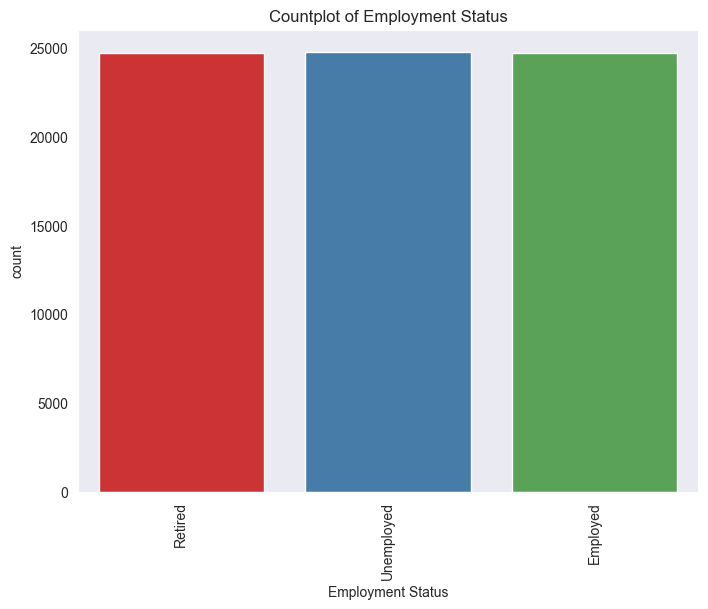

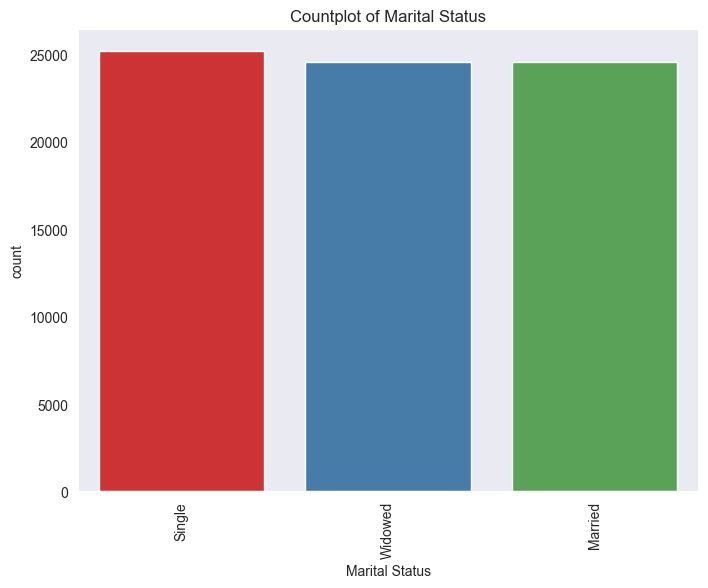

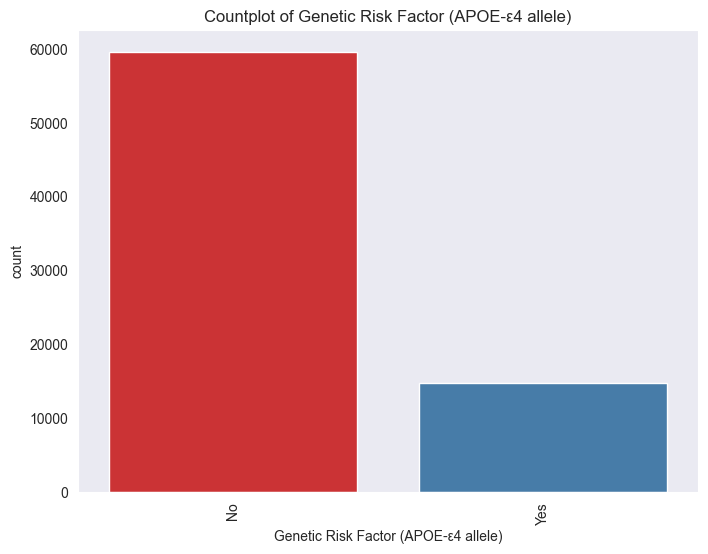

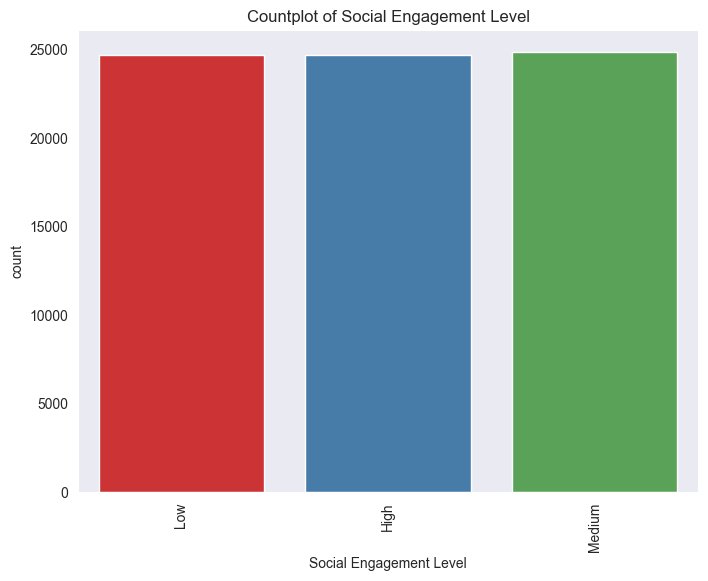

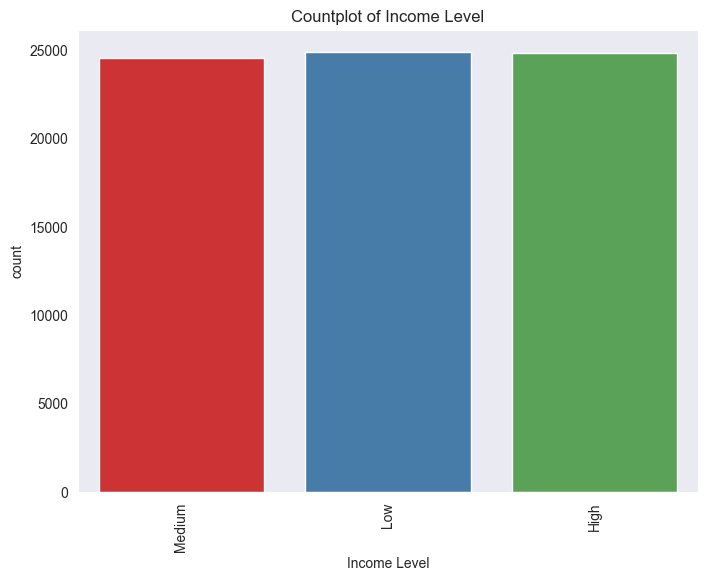

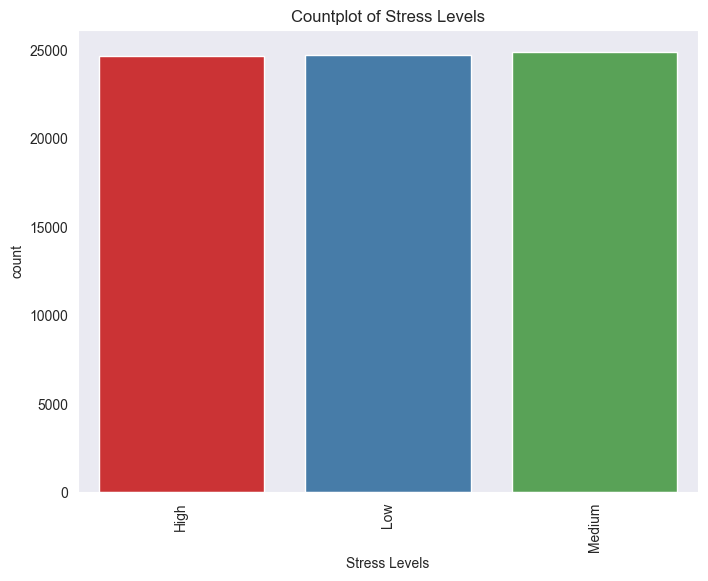

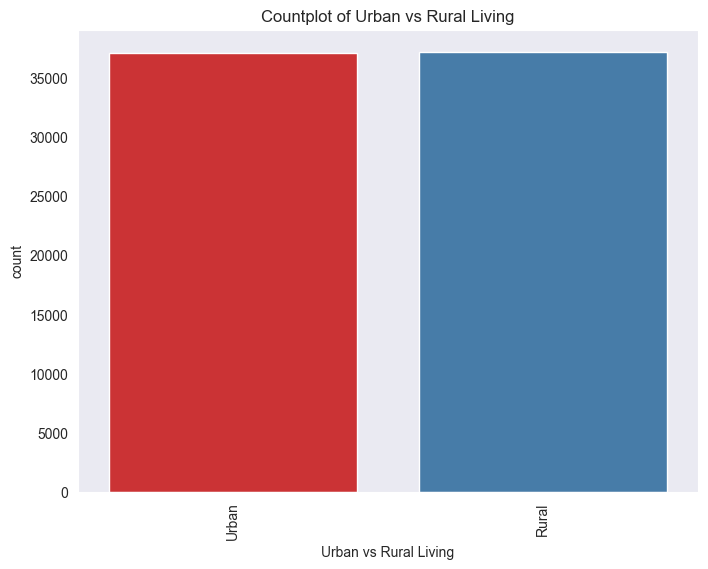

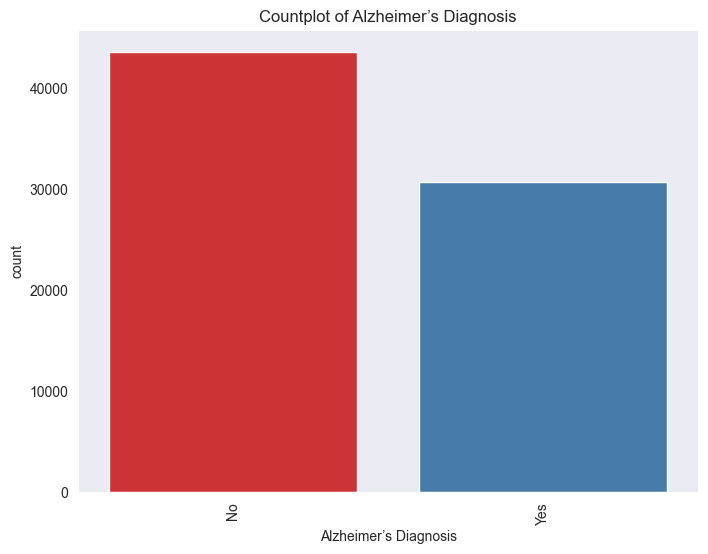

In [144]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=col,palette='Set1')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=90)
    plt.savefig(f'Visuals/{col}_countplot.png')
    plt.show()
    logging.info(f'Countplot saved for {col} column.\n')

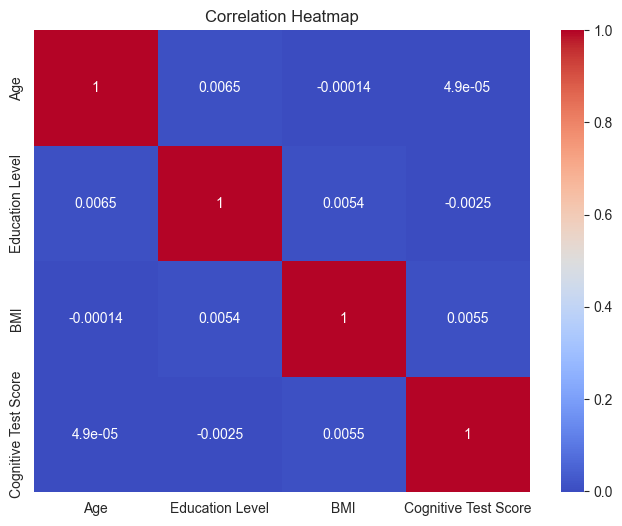

In [145]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('Visuals/correlation_heatmap.png')
plt.show()
logging.info('Correlation heatmap saved.\n')

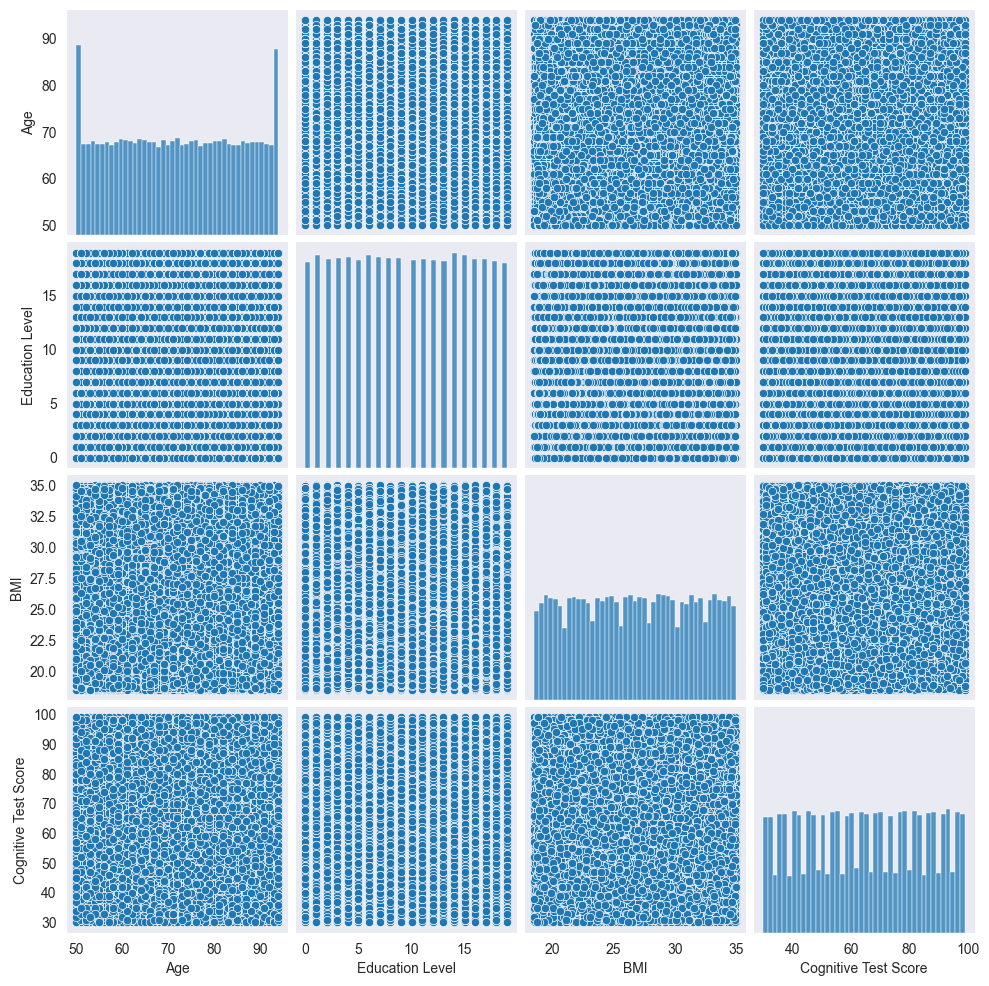

EDA Completed and all plots are logged in 'Visuals/' directory.


In [146]:
sns.pairplot(df[numeric_cols])
plt.savefig('Visuals/pairplot_numeric.png')
plt.show()
logging.info('Pairplot for numeric columns saved.\n')

logging.info('EDA Completed Successfully.\n')
print("EDA Completed and all plots are logged in 'Visuals/' directory.")

----

In [147]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,Normal,No,90,Low,Poor,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,Normal,No,65,Low,Good,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,Normal,No,43,High,Good,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,Normal,No,81,Medium,Average,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,Normal,No,49,High,Poor,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [148]:
for col in df.select_dtypes('object'):
    print(df[col].value_counts())

Country
Brazil          3839
Germany         3807
Australia       3787
Russia          3778
South Africa    3760
Japan           3751
India           3741
South Korea     3732
Argentina       3731
Italy           3724
Canada          3711
France          3710
Norway          3706
Spain           3698
Sweden          3689
Saudi Arabia    3662
UK              3651
USA             3616
Mexico          3598
China           3592
Name: count, dtype: int64
Gender
Female    37249
Male      37034
Name: count, dtype: int64
Physical Activity Level
High      24853
Low       24754
Medium    24676
Name: count, dtype: int64
Smoking Status
Current    24915
Never      24740
Former     24628
Name: count, dtype: int64
Alcohol Consumption
Never           24865
Regularly       24738
Occasionally    24680
Name: count, dtype: int64
Diabetes
No     59527
Yes    14756
Name: count, dtype: int64
Hypertension
No     52134
Yes    22149
Name: count, dtype: int64
Cholesterol Level
Normal    51973
High      22310
Nam

In [149]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Drop unnecessary columns
drop_columns = ['Employment Status', 'Social Engagement Level']
df.drop(columns=[col for col in drop_columns if col in df.columns], errors='ignore', inplace=True)
logging.info(f"Dropped columns: {drop_columns}\n")

# Numeric features
numeric_features = ['Age', 'BMI', 'Cognitive Test Score']

# Categorical features
categorical_features = [col for col in df.columns if col not in numeric_features + ["Alzheimer’s Diagnosis"]]

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# Fit and transform
df_processed = preprocessor.fit_transform(df.drop(columns=["Alzheimer’s Diagnosis"]))

# Get column names for one-hot encoded features
ohe_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_columns = numeric_features + ohe_cols.tolist()

# Convert to DataFrame
df_processed = pd.DataFrame(df_processed, columns=all_columns, index=df.index)

logging.info(f"Processed dataset shape: {df_processed.shape}\n")
print("Encoding and scaling complete.")

# Separate target
X = df_processed
y = df["Alzheimer’s Diagnosis"]

print(X.head())
print(y.head())


Encoding and scaling complete.
        Age       BMI  Cognitive Test Score  Country_Australia  \
0  1.389398  1.305314              1.257660                0.0   
1  0.002719  0.654689              0.017157                0.0   
2  1.081247 -0.814465             -1.074486                0.0   
3 -1.460997  0.927532              0.811079                0.0   
4 -1.075808  0.675677             -0.776765                0.0   

   Country_Brazil  Country_Canada  Country_China  Country_France  \
0             0.0             0.0            0.0             0.0   
1             0.0             0.0            0.0             0.0   
2             0.0             0.0            0.0             0.0   
3             0.0             0.0            1.0             0.0   
4             0.0             0.0            0.0             0.0   

   Country_Germany  Country_India  Country_Italy  Country_Japan  \
0              0.0            0.0            0.0            0.0   
1              0.0           

In [150]:
print("Processed feature shape:", X.shape)
print("Target distribution:\n", y.value_counts())
X.head()

Processed feature shape: (74283, 68)
Target distribution:
 Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64


,Age,BMI,Cognitive Test Score,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_Mexico,Country_Norway,Country_Russia,Country_Saudi Arabia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sweden,Country_UK,Country_USA,Gender_Male,Education Level_1,Education Level_2,Education Level_3,Education Level_4,Education Level_5,Education Level_6,Education Level_7,Education Level_8,Education Level_9,Education Level_10,Education Level_11,Education Level_12,Education Level_13,Education Level_14,Education Level_15,Education Level_16,Education Level_17,Education Level_18,Education Level_19,Physical Activity Level_Low,Physical Activity Level_Medium,Smoking Status_Former,Smoking Status_Never,Alcohol Consumption_Occasionally,Alcohol Consumption_Regularly,Diabetes_Yes,Hypertension_Yes,Cholesterol Level_Normal,Family History of Alzheimer’s_Yes,Depression Level_Low,Depression Level_Medium,Sleep Quality_Good,Sleep Quality_Poor,Dietary Habits_Healthy,Dietary Habits_Unhealthy,Air Pollution Exposure_Low,Air Pollution Exposure_Medium,Marital Status_Single,Marital Status_Widowed,Genetic Risk Factor (APOE-ε4 allele)_Yes,Income Level_Low,Income Level_Medium,Stress Levels_Low,Stress Levels_Medium,Urban vs Rural Living_Urban
0,1.389398,1.305314,1.257660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.002719,0.654689,0.017157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.081247,-0.814465,-1.074486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.460997,0.927532,0.811079,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-1.075808,0.675677,-0.776765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

logging.info(f"Train/Test split done: X_train={X_train.shape}, X_test={X_test.shape}\n")

In [152]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())
logging.info(f"SMOTE applied. New training set shape: X={X_train_res.shape}, y={y_train_res.shape}")

Before SMOTE: Alzheimer’s Diagnosis
No     34856
Yes    24570
Name: count, dtype: int64
After SMOTE: Alzheimer’s Diagnosis
No     34856
Yes    34856
Name: count, dtype: int64


In [153]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(C=1.0,random_state=42)

log_model.fit(X_train_res,y_train_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [154]:
logistic_prediction = log_model.predict(X_test)

In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

metrics = [accuracy_score, confusion_matrix, classification_report]
for metric in metrics:
    result = metric(y_test, logistic_prediction)
    print(f"{metric.__name__}:")
    print(result)
    logging.info(f"LogisticRegression:{metric.__name__}:{result}\n")


accuracy_score:
0.7162280406542371
confusion_matrix:
[[6180 2534]
 [1682 4461]]
classification_report:
              precision    recall  f1-score   support

          No       0.79      0.71      0.75      8714
         Yes       0.64      0.73      0.68      6143

    accuracy                           0.72     14857
   macro avg       0.71      0.72      0.71     14857
weighted avg       0.72      0.72      0.72     14857



In [160]:
from sklearn.model_selection import GridSearchCV,cross_val_score

cv_log = cross_val_score(estimator=log_model,X = X_train_res,y = y_train_res,cv = 5, scoring = 'accuracy')

print('LogisticRegression Cross Validation Check:',cv_log )
print('LogisticRegression Cross Validation  Mean:',cv_log.mean() )
logging.info(f"Logistic Regression CV Scores: {cv_log}")
logging.info(f"Mean CV Accuracy: {cv_log.mean()}")

LogisticRegression Cross Validation Check: [0.71405006 0.71512587 0.71273849 0.7191938  0.72550567]
LogisticRegression Cross Validation  Mean: 0.7173227775651905


In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Initialize Logistic Regression
log_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Use F1-score for Alzheimer’s class as scoring
f1_scorer = make_scorer(f1_score, pos_label='Yes')  # target: 'Yes'/'No'

# GridSearchCV
grid_search = GridSearchCV(
    estimator=log_model,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit on training data (after SMOTE)
grid_search.fit(X_train_res, y_train_res)

# Best model and parameters
best_log = grid_search.best_estimator_
print("Best F1 Score:", grid_search.best_score_)
print("Best Hyperparameters:", grid_search.best_params_)

# Log results
logging.info(f"Best F1 Score (Logistic Regression): {grid_search.best_score_}")
logging.info(f"Best Hyperparameters (Logistic Regression): {grid_search.best_params_}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best F1 Score: 0.7233705925381082
Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


---

In [162]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=150,random_state=42)

rfc_model.fit(X_train_res,y_train_res)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [163]:
rfc_prediction = rfc_model.predict(X_test)

In [164]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

metrics = [accuracy_score, confusion_matrix, classification_report]
for metric in metrics:
    result = metric(y_test, rfc_prediction)
    print(f"{metric.__name__}:")
    print(result)
    logging.info(f"RandomForestClassifier:{metric.__name__}:{result}\n")


accuracy_score:
0.7266608332772431
confusion_matrix:
[[6663 2051]
 [2010 4133]]
classification_report:
              precision    recall  f1-score   support

          No       0.77      0.76      0.77      8714
         Yes       0.67      0.67      0.67      6143

    accuracy                           0.73     14857
   macro avg       0.72      0.72      0.72     14857
weighted avg       0.73      0.73      0.73     14857



In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20,],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV with F1-score focus on Alzheimer’s (Yes)
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1',   # or make_scorer(f1_score, pos_label='Yes')
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit on SMOTE-resampled training data
grid_search_rf.fit(X_train_res, y_train_res)

# Best estimator and hyperparameters
best_rf = grid_search_rf.best_estimator_
print("Best F1 Score (RF):", grid_search_rf.best_score_)
print("Best Hyperparameters (RF):", grid_search_rf.best_params_)

# Log results
logging.info(f"Best F1 Score (Random Forest): {grid_search_rf.best_score_}")
logging.info(f"Best Hyperparameters (Random Forest): {grid_search_rf.best_params_}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits


InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.